#                 Era of Big Data

Like water, Data seems quiet but wild actually!
---

In [1]:
#from IPython.display import HTML
#def css_styling():
#    styles = open("styles/custom.css", "r").read()
#    return HTML(styles)
#css_styling()

Basic of Data Manipulation
---
|Keys|Methods and Analysis|
|---|---|
|Data Input/Ouput|- from Python<br>- from Yahoo <br>- from file |
|Time series Analysis|- Data Visualisation <br>- Data Visualisation |



Case Study
---
How and What the IPhone6 changed the world

# Pandas (Factory for Data)

In [2]:
import datetime

import pandas as pd
import pandas.io.data
from pandas import Series, DataFrame

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 8))


Data Input/Output
===================

Data, $X$, look like

$$ \text{Data: } X({\omega})=x \to \text{Python: } X\text{['}{\omega}\text{']}=x$$

where $\omega$ is the state's variable which we observate, (e.g. time, property), and $x$ is its value.

Where the data come from
------------------

* From Python
* From Yahoo finance
* From CSV files

### 1. From Python 


- pandas.Series([$x_0,\cdots,x_n$], index=['$\omega_0$',$\cdots$,'$\omega_n$'])
  create a time series data with 
  
  $X[$'$\omega_i$'$]=x_i$
  
  where rhe variable $\omega_i$ might be datetime, states, ete; here, the datetime is used.

In [4]:
#Define data from scratch

dates = ['2014-06-03','2014-06-10','2014-06-13']
close = Series([670,80,80], index=dates)


Code
---
    close=
    Series([670,80,80], index=['2014-06-03','2014-06-10','2014-06-13'])
represents:
---
    close['2014-06-03']=670
    close['2014-06-10']=80
    close['2014-06-13']=80

In [5]:
'2014-06-03' in dates

True

In [6]:
close['2014-06-03']

670

In [7]:
# Python dict-style data
mapping = close.to_dict()
mapping

{'2014-06-03': 670, '2014-06-10': 80, '2014-06-13': 80}

In [8]:
region=Series(close.to_dict())

region

2014-06-03    670
2014-06-10     80
2014-06-13     80
dtype: int64

### From Yahoo finance

In [10]:
aapl = pd.io.data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2014, 6, 1), 
                                 end=datetime.datetime(2015, 3, 13))
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-06-02,633.96,634.83,622.50,628.65,92337700,88.63
2014-06-03,628.46,638.74,628.25,637.54,73177300,89.88
2014-06-04,637.44,647.89,636.11,644.82,83870500,90.91
2014-06-05,646.20,649.37,642.61,647.35,75951400,91.26
2014-06-06,649.90,651.26,644.47,645.57,87484600,91.01


In [11]:
TSM = pd.io.data.get_data_yahoo('TSM', 
                                 start=datetime.datetime(2014, 6, 1), 
                                 end=datetime.datetime(2015, 3, 13))
TSM.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-09,23.67,23.70,23.26,23.45,15379200,23.45
2015-03-10,23.02,23.26,22.91,23.05,12330200,23.05
2015-03-11,23.41,23.72,23.41,23.49,9406000,23.49
2015-03-12,23.50,23.75,23.47,23.53,10863400,23.53
2015-03-13,23.66,23.97,23.65,23.88,9625600,23.88


In [12]:
samsung = pd.io.data.get_data_yahoo('005930.KS', 
                                 start=datetime.datetime(2014, 6, 1), 
                                 end=datetime.datetime(2015, 3, 13))
samsung.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-09,1440000,1440000,1420000,1420000,156200,1420000
2015-03-10,1434000,1443000,1420000,1421000,208300,1421000
2015-03-11,1419000,1479000,1418000,1474000,422100,1474000
2015-03-12,1460000,1473000,1447000,1447000,383000,1447000
2015-03-13,1461000,1479000,1455000,1457000,188200,1457000


In [13]:
aapl.to_csv('data/aapl-2015-3-13.csv')
TSM.to_csv('data/TSM-2015-3-13.csv')
samsung.to_csv('data/samsung-2015-3-13.csv')

Also retrieve multi-column data
---

In [14]:
df_Pack = pd.io.data.get_data_yahoo(['AAPL', 'TSM', '005930.KS'], 
                               start=datetime.datetime(2014, 6, 1), 
                               end=datetime.datetime(2015, 3, 13))['Adj Close']
df_Pack.head()

,005930.KS,AAPL,TSM
Date,,,
2014-06-02,1433473.27,88.63,20.21
2014-06-03,1448251.34,89.88,20.77
2014-06-04,1448251.34,90.91,20.64
2014-06-05,1435443.68,91.26,20.73
2014-06-06,1435443.68,91.01,20.63


In [7]:
# Remember save the data
df_Pack.to_csv('data/stocks.csv')
#!head aapl.csv

In [15]:
aapl = pd.read_csv('data/aapl-2015-3-13.csv',index_col='Date',parse_dates=True)
TSM=pd.read_csv('data/TSM-2015-3-13.csv',index_col='Date', parse_dates=True)
samsung=pd.read_csv('data/samsung-2015-3-13.csv',index_col='Date', parse_dates=True)

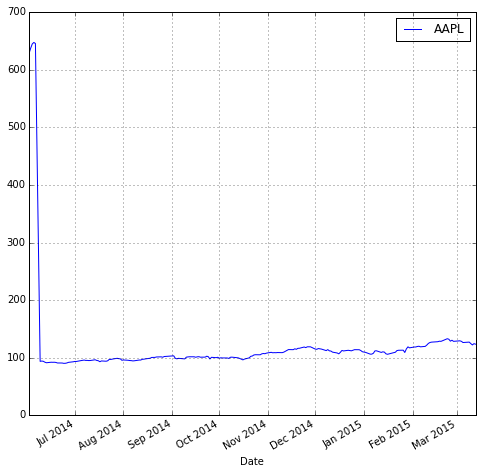

In [16]:
close_aapl=aapl['Close']
close_aapl.plot(label='AAPL')

plt.legend()

### [QUESTION] What happens during early June, 2014 ?
There exists a big jump of the AAPL's price in the market during early June, 2014.

In [17]:
aapl['Close'].head(10)

Date
2014-06-02    628.65
2014-06-03    637.54
2014-06-04    644.82
2014-06-05    647.35
2014-06-06    645.57
2014-06-09     93.70
2014-06-10     94.25
2014-06-11     93.86
2014-06-12     92.29
2014-06-13     91.28
Name: Close, dtype: float64

### Data Visualisation

- Direct Visualization

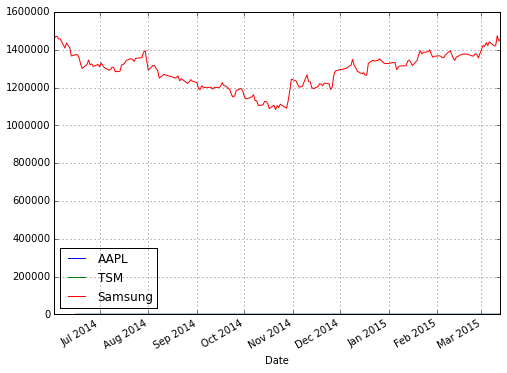

In [18]:
close_aapl=aapl['Close'][10:]
close_TSM=TSM['Close'][10:]
close_samsung=samsung['Close']

close_aapl.plot(label='AAPL')
close_TSM.plot(label='TSM')
close_samsung.plot(label='Samsung',figsize=[8,6])
#mavg.plot(label='mavg')
plt.legend(loc='lower left')

Where are the pictures of AAPL and TMC?

### Better, but ...

- Subplots respectively 

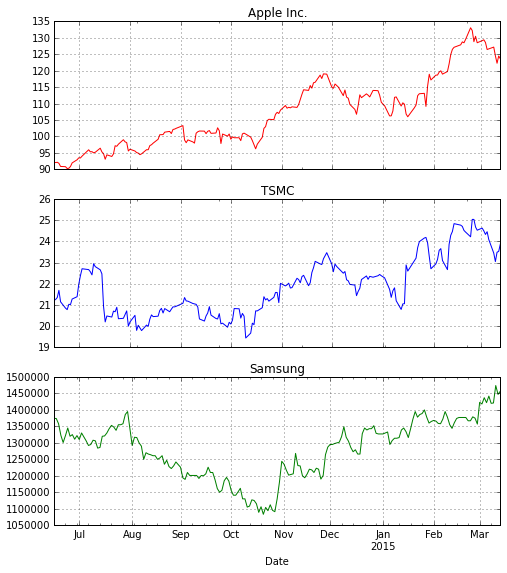

In [19]:
fig=plt.figure(figsize=(8,10))
close_aapl=aapl['Close'][10:]
close_TSM=TSM['Close'][10:]
close_samsung=samsung['Close'][10:]

ax1 = fig.add_subplot(311)
close_aapl.plot(ax=ax1,color='red')
plt.title('Apple Inc.')

ax2 = fig.add_subplot(312)
close_TSM.plot(ax=ax2,color='blue')
plt.title('TSMC')

ax3 = fig.add_subplot(313)
close_samsung.plot(ax=ax3,color='green')
plt.title('Samsung')
#mavg.plot(label='mavg')
#plt.legend()

### Data Rescaling 

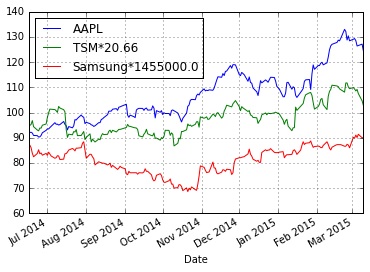

In [18]:
%matplotlib inline

close_aapl=aapl['Close'][10:]
close_TSM=TSM['Close'][10:]*aapl['Close'][10]/TSM['Close'][0]
close_samsung=samsung['Close'][10:]*aapl['Close'][10]/samsung['Close'][0]

close_aapl.plot(label='AAPL' )
close_TSM.plot(label='TSM*%s' %TSM['Close'][0])
close_samsung.plot(label='Samsung*%s' %samsung['Close'][0])
#mavg.plot(label='mavg')

plt.legend(loc='upper left')

In [19]:
aapl.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-06-02, ..., 2015-03-10]
Length: 195, Freq: None, Timezone: None

### From CSV files

In [20]:
df_aapl = pd.read_csv('data/aapl-2015-3-13.csv', index_col='Date', parse_dates=True)
df_aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-06-02,633.96,634.83,622.50,628.65,92337700,88.63
2014-06-03,628.46,638.74,628.25,637.54,73177300,89.88
2014-06-04,637.44,647.89,636.11,644.82,83870500,90.91
2014-06-05,646.20,649.37,642.61,647.35,75951400,91.26
2014-06-06,649.90,651.26,644.47,645.57,87484600,91.01


In [30]:
df_aapl.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-06-02, ..., 2015-03-10]
Length: 195, Freq: None, Timezone: None

Relation between Apple and TMSC  
================
Friends or Enemies?
---

In [21]:
aapl_return=aapl['Close'].pct_change()
TSM_return=TSM['Close'].pct_change()


In [22]:
aapl_return[-10:],TSM_return[-10:]

(Date
 2015-03-02    0.004904
 2015-03-03    0.002092
 2015-03-04   -0.006339
 2015-03-05   -0.016571
 2015-03-06    0.001503
 2015-03-09    0.004265
 2015-03-10   -0.020686
 2015-03-11   -0.018231
 2015-03-12    0.018079
 2015-03-13   -0.006910
 Name: Close, dtype: float64, Date
 2015-03-02    0.004077
 2015-03-03   -0.005278
 2015-03-04   -0.006939
 2015-03-05    0.005343
 2015-03-06   -0.015127
 2015-03-09   -0.026567
 2015-03-10   -0.017058
 2015-03-11    0.019089
 2015-03-12    0.001703
 2015-03-13    0.014875
 Name: Close, dtype: float64)

In [23]:
corr1=pd.ols(y=TSM_return,x=aapl_return)
corr1


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         197
Number of Degrees of Freedom:   2

R-squared:         0.0005
Adj R-squared:    -0.0046

Rmse:              0.0166

F-stat (1, 195):     0.1050, p-value:     0.7463

Degrees of Freedom: model 1, resid 195

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0061     0.0189       0.32     0.7463    -0.0310     0.0433
     intercept     0.0009     0.0012       0.75     0.4540    -0.0014     0.0032
---------------------------------End of Summary---------------------------------

In [24]:
corr1.beta

x            0.006138
intercept    0.000888
dtype: float64

(-0.1, 0.1)

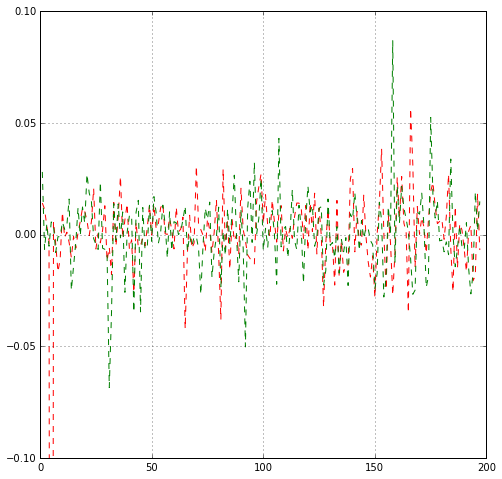

In [25]:
import numpy as np
plt.plot( aapl_return, 'r--')
plt.plot(TSM_return,  'g--')

ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
#plt.plot(x, corr1.beta[1] + corr1.beta[0] * x, 'b', lw=2)

plt.grid(True)
plt.ylim([-0.1,0.1])
#plt.axis('tight')

Series and DataFrame: First steps
=================================

* **Indexing**: data at specified dates; 
* **Slicing**: data during certain time period;
* **Selected Data**: Selected data by certain conditions;
* **Creating new columns**: analysis.

In [34]:
print("Closed prices of the last 10 days:")
ts_aapl = df_aapl['Close'][-10:]
ts_aapl

Closed prices of the last 10 days:


Date
2015-02-25    128.79
2015-02-26    130.42
2015-02-27    128.46
2015-03-02    129.09
2015-03-03    129.36
2015-03-04    128.54
2015-03-05    126.41
2015-03-06    126.60
2015-03-09    127.14
2015-03-10    124.51
Name: Close, dtype: float64

### indexing

A DataFrame is a collection of Series objects. Slicing out a DataFrame column returns a Series.

In [35]:
print(" The fifth day:")
date = ts_aapl.index[5]
date

 The fifth day:


Timestamp('2015-03-04 00:00:00')

In [39]:
print(ts_aapl[date],ts_aapl[5])

(111.89, 111.89)


### Selected Data
We can also select multiple columns.

In [29]:
df_aapl[['Open', 'Close']].head()

,Open,Close
Date,,
2014-06-02,633.96,628.65
2014-06-03,628.46,637.54
2014-06-04,637.44,644.82
2014-06-05,646.20,647.35
2014-06-06,649.90,645.57


###Creating New Column
New columns can be added on the fly.

In [36]:
df_aapl['diff'] = df_aapl.Open - df_aapl.Close
df_aapl.head()

,Open,High,Low,Close,Volume,Adj Close,diff
Date,,,,,,,
2014-06-02,633.96,634.83,622.50,628.65,92337700,88.63,5.31
2014-06-03,628.46,638.74,628.25,637.54,73177300,89.88,-9.08
2014-06-04,637.44,647.89,636.11,644.82,83870500,90.91,-7.38
2014-06-05,646.20,649.37,642.61,647.35,75951400,91.26,-1.15
2014-06-06,649.90,651.26,644.47,645.57,87484600,91.01,4.33


### Delete column
...and deleted on the fly.

In [32]:
del df_aapl['diff']
df_aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-06-02,633.96,634.83,622.50,628.65,92337700,88.98
2014-06-03,628.46,638.74,628.25,637.54,73177300,90.24
2014-06-04,637.44,647.89,636.11,644.82,83870500,91.27
2014-06-05,646.20,649.37,642.61,647.35,75951400,91.62
2014-06-06,649.90,651.26,644.47,645.57,87484600,91.37


Common Financial Computations
-----------------------------

- **Moving Average**: pandas.rolling_mean(*data*, *denumerator of average*)
$$ $$
$$ \text{MAvg}=\frac{X_t+\cdots+X_{t+n-1}}{n\text{ days}}$$
- **Returns**: data.pct_change( ) which is defined as follows:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [37]:
close_px_aapl = df_aapl['Adj Close']

### Moving Average

40-days Average 

In [38]:
mavg_aapl = pd.rolling_mean(close_px_aapl, 40)
mavg_aapl[-10:]

Date
2015-02-25    116.56375
2015-02-26    116.98775
2015-02-27    117.39725
2015-03-02    117.87575
2015-03-03    118.38725
2015-03-04    118.95500
2015-03-05    119.46925
2015-03-06    119.95100
2015-03-09    120.34325
2015-03-10    120.66675
dtype: float64

### Returns

Revenue

In [39]:
rets_aapl = close_px_aapl / close_px_aapl.shift(1) - 1
rets_aapl.head()

Date
2014-06-02         NaN
2014-06-03    0.014104
2014-06-04    0.011460
2014-06-05    0.003850
2014-06-06   -0.002739
Name: Adj Close, dtype: float64

[Note] NaN means "not a number".

Or alternatively `.pct_change()`.

In [37]:
close_px_aapl.pct_change().head()

Date
2014-06-02         NaN
2014-06-03    0.014160
2014-06-04    0.011414
2014-06-05    0.003835
2014-06-06   -0.002729
Name: Adj Close, dtype: float64

Plotting Basics
---------------

Series and DataFrames have an associated `.plot()` command (uses Matplotlib behind the scenes).

In [ ]:
close_px_aapl.plot(label='AAPL')
mavg_aapl.plot(label='mavg')
plt.legend('upper left')

## Optional

In [28]:
df_Pack = pd.io.data.get_data_yahoo(['AAPL', 'TSM', '005930.KS'], 
                               start=datetime.datetime(2014, 6, 1), 
                               end=datetime.datetime(2015, 3, 15))['Adj Close']
df_Pack.tail()

,005930.KS,AAPL,TSM
Date,,,
2015-03-09,1420000,127.14,23.45
2015-03-10,1421000,124.51,23.05
2015-03-11,1474000,122.24,23.49
2015-03-12,1447000,124.45,23.53
2015-03-13,1457000,123.59,23.88


In [ ]:
df_Pack = pd.io.data.get_data_yahoo(['AAPL', 'TSM', '005930.KS'], 
                               start=datetime.datetime(2014, 6, 1), 
                               end=datetime.datetime(2015, 1, 15))['Adj Close']
df_Pack.head()

In [29]:
rets_Pack = df_Pack.pct_change()

## What the relation among Apple Inc., TMSC and Samsung

- plt.scatter[data A, data B]
- pd.scatter_matrix(DataPack, diagonal=kde):  scatter for multiple data with kde at the diagonal element.
- dataPack.corr(): correlation matrix 

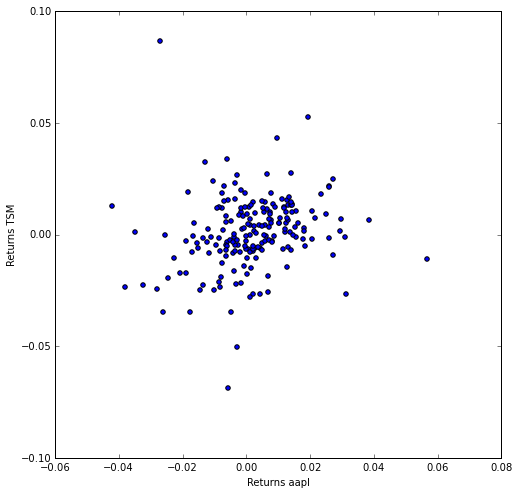

In [30]:
plt.scatter(rets_Pack.AAPL, rets_Pack.TSM)
plt.xlabel('Returns aapl')
plt.ylabel('Returns TSM')

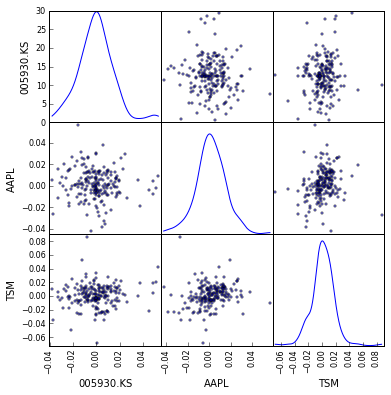

In [31]:
pd.scatter_matrix(rets_Pack, diagonal='kde', figsize=(6, 6));

In [32]:
corr_Pack = rets_Pack.corr()
corr_Pack

,005930.KS,AAPL,TSM
005930.KS,1.000000,-0.06274,0.100585
AAPL,-0.062740,1.00000,0.200200
TSM,0.100585,0.20020,1.000000


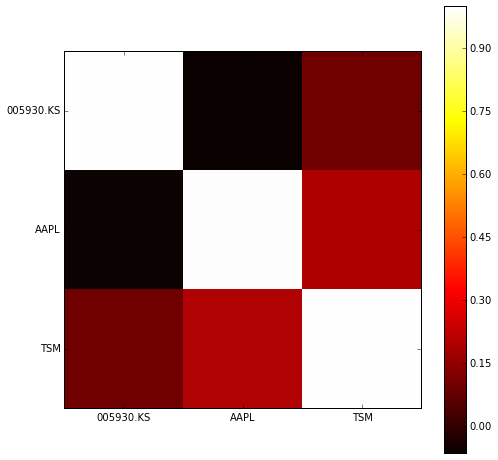

In [33]:
plt.imshow(corr_Pack, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_Pack)), corr_Pack.columns)
plt.yticks(range(len(corr_Pack)), corr_Pack.columns);

One thing we are often interested in is the relationship of expected returns and the risk we are taking one. Often there is a trade-off between the two.

Here we use `plt.annotate` to put labels on the scatterplot.

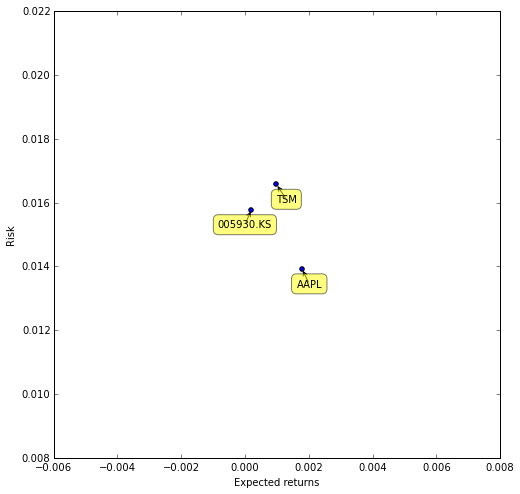

In [34]:
plt.scatter(rets_Pack.mean(), rets_Pack.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets_Pack.columns, rets_Pack.mean(), rets_Pack.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Data alignment and dealing with missing values
==============

* Join, merge, concatenate
* Filling NaNs

Lets pull some more securities from Yahoo finance and build a DataFrame of the adjusted closing prices.

In [54]:
series_list = []
securities = ['AAPL', 'TSM', '005930.KS']
for security in securities:
    s = pd.io.data.get_data_yahoo(security, start=datetime.datetime(2014, 6, 1), end=datetime.datetime(2015, 1, 15))['Adj Close']
    s.name = security # Rename series to match security name
    series_list.append(s)

`pd.concat` can be used to concatenate multiple `Series` into one `DataFrame`.

In [55]:
df = pd.concat(series_list, axis=1)
df.head()

,AAPL,TSM,005930.KS
Date,,,
2014-06-02,88.98,20.21,1454527.78
2014-06-03,90.24,20.77,1469522.92
2014-06-04,91.27,20.64,1469522.92
2014-06-05,91.62,20.73,1456527.13
2014-06-06,91.37,20.63,1456527.13


In [35]:
df.ix[0, 'AAPL'] = np.nan
df.ix[1, ['GOOG', 'IBM']] = np.nan
df.ix[[1, 2, 3], 'MSFT'] = np.nan

df.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,495.52,168.24,23.32
2011-10-04,364.67,NaN,NaN,NaN
2011-10-05,370.30,504.70,171.69,NaN
2011-10-06,369.44,514.71,176.39,NaN
2011-10-07,362.02,515.12,177.07,24.95


Pandas has great support for computing with missing values.

In [36]:
(df.AAPL + df.GOOG).head()

Date
2011-10-03       NaN
2011-10-04       NaN
2011-10-05    875.00
2011-10-06    884.15
2011-10-07    877.14
dtype: float64

One common approacht to impute missing values in time series is forward filling.

In [37]:
df.ffill().head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,495.52,168.24,23.32
2011-10-04,364.67,495.52,168.24,23.32
2011-10-05,370.30,504.70,171.69,23.32
2011-10-06,369.44,514.71,176.39,23.32
2011-10-07,362.02,515.12,177.07,24.95


In [1]:
!jupyter nbconvert --to html stock-Copy1.ipynb

[NbConvertApp] Converting notebook stock-Copy1.ipynb to html
[NbConvertApp] Writing 656973 bytes to stock-Copy1.html
